<a href="https://colab.research.google.com/github/psukphranee/Machine-Learning-Projects/blob/master/Chapter%203%3A%20Classification/MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Classification

# Get data and look at a sample

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [6]:
X, y = mnist.data, mnist.target


In [41]:
some_sample = X_train[0]
some_sample_img = some_sample.reshape(28,28);

In [42]:
import numpy as np

y = y.astype(np.uint8)

In [43]:
X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]

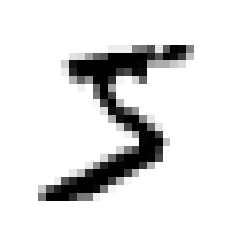

In [44]:
import matplotlib.pyplot as plt

plt.imshow(some_sample_img, cmap='binary')
plt.axis('off')
plt.show()

In [37]:
y[5]

2

## Train a binary classifier: 5 vs non-5

In [51]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(random_state=42)

In [57]:
y_train_5 = y_train==5
y_test_5 = (y_test==5)

In [58]:
y_train_5.shape


(60000,)

In [59]:
sgd.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [61]:
sgd.predict([some_sample])

array([ True])

In [62]:
from sklearn.model_selection import cross_val_predict

y_train_predict = cross_val_predict(sgd, X_train, y_train_5, cv=3)

In [64]:
y_train_predict.shape

(60000,)

In [66]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_predict)

array([[53892,   687],
       [ 1891,  3530]])

In [67]:
confusion_matrix(y_train_5, y_train_5)

array([[54579,     0],
       [    0,  5421]])